In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [15]:
df=pd.read_csv('sampleWeather.csv')
df.columns=['tempTrain','tempTest']
data1 = df['tempTrain'].values
data2 = df['tempTest'].values
print(data1,"\n",data2)

[34.5 34.4 34.7 34.2 32.5 33.9 34.1 34.3 34.8 33.8 34.  34.4 34.6 34.2
 34.5 34.8 34.8 33.3 34.5 32.6 32.5 33.  31.8 31.3 31.5 32.8 32.2 33.5
 34.3 32.4] 
 [30.6 30.9 30.7 30.6 30.7 30.5 31.8 31.4 32.6 32.6 32.  32.3 32.1 32.5
 32.8 32.5 31.8 32.  31.9 32.5 33.2 33.2 30.5 32.9 32.3 31.7 34.1 31.3
 34.4 34.4]


In [16]:
def differenceAlgorithm(data):
    tempList=[]
    for i in range(len(data)-1):
        tempList.append(abs(data[i]-data[i+1]))
    return tempList

In [17]:
tempDiffTrain = differenceAlgorithm(data1)
tempDiffTest = differenceAlgorithm(data2)
print(tempDiffTest)

[0.29999999999999716, 0.1999999999999993, 0.09999999999999787, 0.09999999999999787, 0.1999999999999993, 1.3000000000000007, 0.40000000000000213, 1.2000000000000028, 0.0, 0.6000000000000014, 0.29999999999999716, 0.19999999999999574, 0.3999999999999986, 0.29999999999999716, 0.29999999999999716, 0.6999999999999993, 0.1999999999999993, 0.10000000000000142, 0.6000000000000014, 0.7000000000000028, 0.0, 2.700000000000003, 2.3999999999999986, 0.6000000000000014, 0.5999999999999979, 2.400000000000002, 2.8000000000000007, 3.099999999999998, 0.0]


In [18]:
from sklearn.preprocessing import minmax_scale

X=minmax_scale(tempDiffTrain,feature_range=(0,1))
y=minmax_scale(tempDiffTest,feature_range=(0,1))

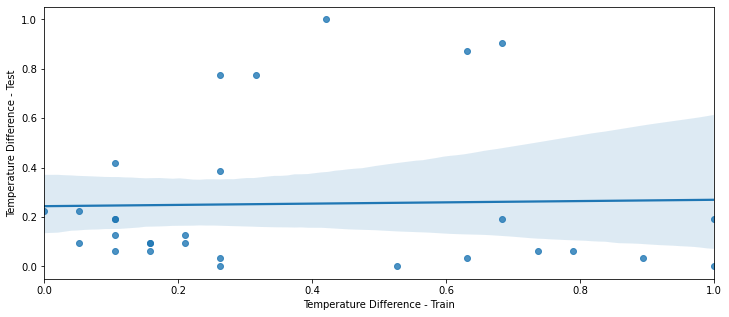

In [19]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.regplot(X,y)
plt.xlabel("Temperature Difference - Train")
plt.ylabel("Temperature Difference - Test")
plt.show()

In [20]:
import numpy as np
X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
result = model.score(X,y)
#print(model.coef_,model.intercept_)
print("{0}".format(result))

0.0006909376626240693


In [22]:
X=np.array(tempDiffTrain).reshape(-1,1)
y=np.array(tempDiffTest).reshape(-1,1)

In [23]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)
y=s.fit_transform(y)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
result = model.score(X,y)
#print(model.coef_,model.intercept_)
print("{0}".format(result))

0.0006909376626242913


# Polynomial Regression

R^2 score = 0.07


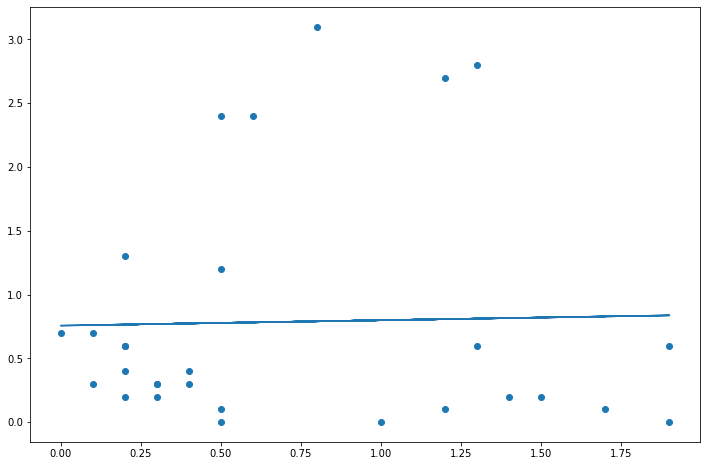

In [25]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X,tempDiffTest)
model_pred = lr.predict(X)
plt.figure(figsize=(12,8))
plt.scatter(tempDiffTrain,tempDiffTest);
plt.plot(tempDiffTrain, model_pred);
print("R^2 score = {:.2f}".format(r2_score(tempDiffTrain, model_pred)))

In [26]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
tempDiffTrain=np.array(tempDiffTrain)
tempDiffTest=np.array(tempDiffTest)

In [27]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, tempDiffTest)


X_fit = np.arange(tempDiffTrain.min(), tempDiffTrain.max(), 0.001)[:, np.newaxis]

y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

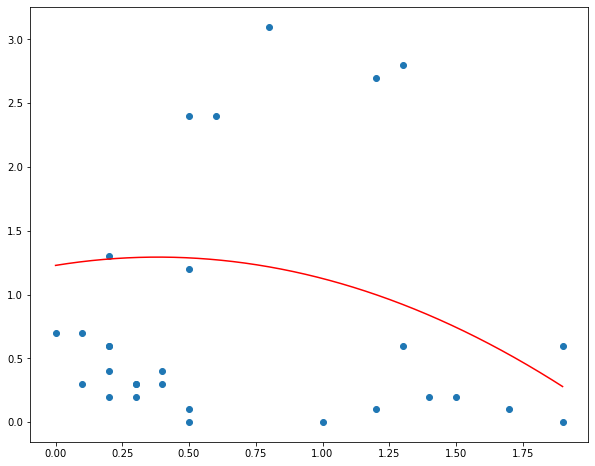

In [28]:
plt.figure(figsize=(10,8));
plt.scatter(tempDiffTrain, tempDiffTest);
plt.plot(X_fit, y_pred, color='red');